In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv("final_data.csv")

In [3]:
df.head()

,Unnamed: 0,Date,Commodity,Unit,Minimum,Maximum,Average
0,0,04/15/2013,गोलभेडा ठूलो(नेपाली),के.जी.,रू २२.००,रू २५.००,रू २४.००
1,1,04/15/2013,गोलभेडा सानो(लोकल),के.जी.,रू २०.००,रू २४.००,रू २२.००
2,2,04/15/2013,आलु रातो,के.जी.,रू १४.००,रू १५.००,रू १५.००
3,3,04/15/2013,प्याज सुकेको (भारतीय),के.जी.,रू २३.००,रू २५.००,रू २४.००
4,4,04/15/2013,गाजर(लोकल),के.जी.,रू २८.००,रू ३५.००,रू ३१.००


In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'Commodity', 'Unit', 'Minimum', 'Maximum',
       'Average'],
      dtype='object')

In [5]:
df.drop(columns='Unnamed: 0', inplace=True)

In [6]:
df.head()

,Date,Commodity,Unit,Minimum,Maximum,Average
0,04/15/2013,गोलभेडा ठूलो(नेपाली),के.जी.,रू २२.००,रू २५.००,रू २४.००
1,04/15/2013,गोलभेडा सानो(लोकल),के.जी.,रू २०.००,रू २४.००,रू २२.००
2,04/15/2013,आलु रातो,के.जी.,रू १४.००,रू १५.००,रू १५.००
3,04/15/2013,प्याज सुकेको (भारतीय),के.जी.,रू २३.००,रू २५.००,रू २४.००
4,04/15/2013,गाजर(लोकल),के.जी.,रू २८.००,रू ३५.००,रू ३१.००


In [7]:
df.shape

(316627, 6)

In [8]:
df_tomato = df[df['Commodity'] == 'गोलभेडा ठूलो(नेपाली)']

In [9]:
df_tomato.head()

,Date,Commodity,Unit,Minimum,Maximum,Average
0,04/15/2013,गोलभेडा ठूलो(नेपाली),के.जी.,रू २२.००,रू २५.००,रू २४.००
72,04/16/2013,गोलभेडा ठूलो(नेपाली),के.जी.,रू २२.००,रू २६.००,रू २५.००
142,04/17/2013,गोलभेडा ठूलो(नेपाली),के.जी.,रू २५.००,रू ३०.००,रू २७.००
212,04/18/2013,गोलभेडा ठूलो(नेपाली),के.जी.,रू २४.००,रू २८.००,रू २६.००
292,04/21/2013,गोलभेडा ठूलो(नेपाली),के.जी.,रू २०.००,रू २४.००,रू २२.००


In [10]:
df_tomato.isnull().sum()

Date         0
Commodity    0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64

In [11]:
unique_date = pd.Index(df_tomato['Date'].unique())

In [12]:
unique_date

Index(['04/15/2013', '04/16/2013', '04/17/2013', '04/18/2013', '04/21/2013',
       '04/22/2013', '04/23/2013', '04/25/2013', '04/26/2013', '04/28/2013',
       ...
       '08/07/2024', '08/08/2024', '08/09/2024', '08/10/2024', '08/11/2024',
       '08/12/2024', '08/13/2024', '08/14/2024', '08/15/2024', '08/16/2024'],
      dtype='object', length=3497)

In [13]:
start_date = datetime(2013, 4, 15)
end_date = datetime(2024, 8, 16)

# Generate the range of dates for the year 2024
date_range = []
current = start_date
while current <= end_date:
    date_range.append(current.strftime('%m/%d/%Y'))
    current += timedelta(days=1)


In [14]:
date_range = pd.Index(date_range)

In [15]:
date_range

Index(['04/15/2013', '04/16/2013', '04/17/2013', '04/18/2013', '04/19/2013',
       '04/20/2013', '04/21/2013', '04/22/2013', '04/23/2013', '04/24/2013',
       ...
       '08/07/2024', '08/08/2024', '08/09/2024', '08/10/2024', '08/11/2024',
       '08/12/2024', '08/13/2024', '08/14/2024', '08/15/2024', '08/16/2024'],
      dtype='object', length=4142)

In [16]:
missing_dates = date_range.difference(unique_date)

In [17]:
missing_dates

Index(['01/04/2014', '01/10/2015', '01/11/2014', '01/15/2014', '01/15/2018',
       '01/18/2014', '01/24/2015', '01/25/2014', '01/25/2021', '01/26/2021',
       ...
       '12/21/2017', '12/22/2017', '12/23/2017', '12/24/2017', '12/25/2013',
       '12/25/2017', '12/26/2017', '12/28/2013', '12/28/2014', '12/30/2013'],
      dtype='object', length=645)

In [18]:
print("Missing Price lengths :",len(missing_dates))

Missing Price lengths : 645


In [19]:
columns = ['Date', 'Commodity', 'Unit', 'Minimum', 'Maximum', 'Average']

In [20]:
complete_df = pd.DataFrame(date_range, columns=['Date'])

In [21]:
final_df = pd.merge(complete_df,df_tomato, on=['Date'], how='left')

In [22]:
final_df

,Date,Commodity,Unit,Minimum,Maximum,Average
0,04/15/2013,गोलभेडा ठूलो(नेपाली),के.जी.,रू २२.००,रू २५.००,रू २४.००
1,04/16/2013,गोलभेडा ठूलो(नेपाली),के.जी.,रू २२.००,रू २६.००,रू २५.००
2,04/17/2013,गोलभेडा ठूलो(नेपाली),के.जी.,रू २५.००,रू ३०.००,रू २७.००
3,04/18/2013,गोलभेडा ठूलो(नेपाली),के.जी.,रू २४.००,रू २८.००,रू २६.००
4,04/19/2013,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4137,08/12/2024,गोलभेडा ठूलो(नेपाली),के.जी.,रू ९०.००,रू १००.००,रू ९६.६७
4138,08/13/2024,गोलभेडा ठूलो(नेपाली),के.जी.,रू ९०.००,रू १००.००,रू ९५.००
4139,08/14/2024,गोलभेडा ठूलो(नेपाली),के.जी.,रू ८०.००,रू ९०.००,रू ८६.६७
4140,08/15/2024,गोलभेडा ठूलो(नेपाली),के.जी.,रू ९०.००,रू १००.००,रू ९५.००


In [23]:
final_df.drop(columns=['Commodity', 'Unit', 'Minimum', 'Maximum'], inplace=True)

In [24]:
final_df

,Date,Average
0,04/15/2013,रू २४.००
1,04/16/2013,रू २५.००
2,04/17/2013,रू २७.००
3,04/18/2013,रू २६.००
4,04/19/2013,NaN
...,...,...
4137,08/12/2024,रू ९६.६७
4138,08/13/2024,रू ९५.००
4139,08/14/2024,रू ८६.६७
4140,08/15/2024,रू ९५.००


In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4142 non-null   object
 1   Average  3497 non-null   object
dtypes: object(2)
memory usage: 64.8+ KB


In [26]:
final_df['Date'] = pd.to_datetime(final_df['Date'])

In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     4142 non-null   datetime64[ns]
 1   Average  3497 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 64.8+ KB


In [28]:
final_df['Date'] = final_df['Date'].dt.date

In [29]:
final_df.set_index('Date', inplace=True)

In [30]:
final_df

,Average
Date,
2013-04-15,रू २४.००
2013-04-16,रू २५.००
2013-04-17,रू २७.००
2013-04-18,रू २६.००
2013-04-19,NaN
...,...
2024-08-12,रू ९६.६७
2024-08-13,रू ९५.००
2024-08-14,रू ८६.६७


In [31]:
final_df['Average'] = final_df['Average'].str.replace("रू","")

In [32]:
final_df

,Average
Date,
2013-04-15,२४.००
2013-04-16,२५.००
2013-04-17,२७.००
2013-04-18,२६.००
2013-04-19,NaN
...,...
2024-08-12,९६.६७
2024-08-13,९५.००
2024-08-14,८६.६७


In [33]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4142 entries, 2013-04-15 to 2024-08-16
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Average  3497 non-null   object
dtypes: object(1)
memory usage: 64.7+ KB


In [34]:
devanagari_to_english = {
    '०': '0', '१': '1', '२': '2', '३': '3', '४': '4',
    '५': '5', '६': '6', '७': '7', '८': '8', '९': '9'
}

def replace_devanagari_with_eng(text):
    for dev, eng in devanagari_to_english.items():
        text = text.replace(dev, eng)
    return text

final_df['Average'] = final_df['Average'].astype('str').apply(replace_devanagari_with_eng).astype('float')


In [35]:
final_df

,Average
Date,
2013-04-15,24.00
2013-04-16,25.00
2013-04-17,27.00
2013-04-18,26.00
2013-04-19,NaN
...,...
2024-08-12,96.67
2024-08-13,95.00
2024-08-14,86.67


In [36]:
final_df.isnull().sum()

Average    645
dtype: int64

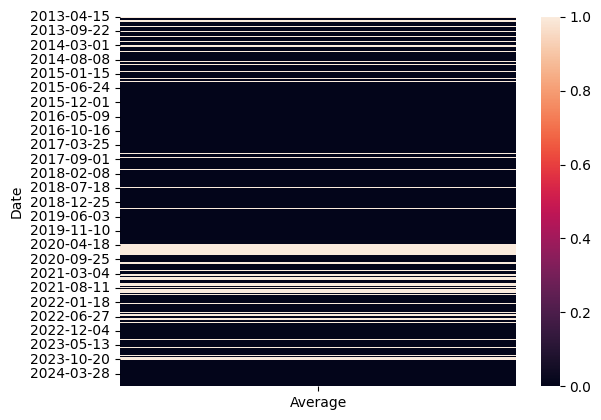

In [37]:
sns.heatmap(final_df.isnull(), cbar=True)
plt.show()

In [38]:
final_df.fillna(final_df.ewm(span=7, adjust=False).mean(), inplace=True)

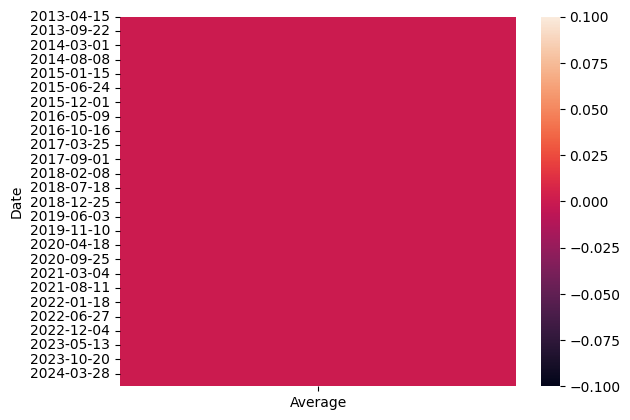

In [39]:
sns.heatmap(final_df.isnull(), cbar=True)
plt.show()

In [40]:
final_df.head()

,Average
Date,
2013-04-15,24.000000
2013-04-16,25.000000
2013-04-17,27.000000
2013-04-18,26.000000
2013-04-19,25.203125


In [41]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4142 entries, 2013-04-15 to 2024-08-16
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Average  4142 non-null   float64
dtypes: float64(1)
memory usage: 64.7+ KB


In [42]:
final_df.describe()

,Average
count,4142.000000
mean,53.166651
std,21.145290
min,16.000000
25%,38.000000
50%,48.000000
75%,64.532310
max,170.000000


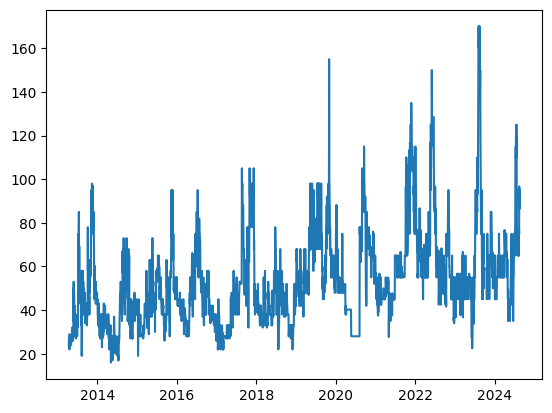

In [43]:
plt.plot(final_df)

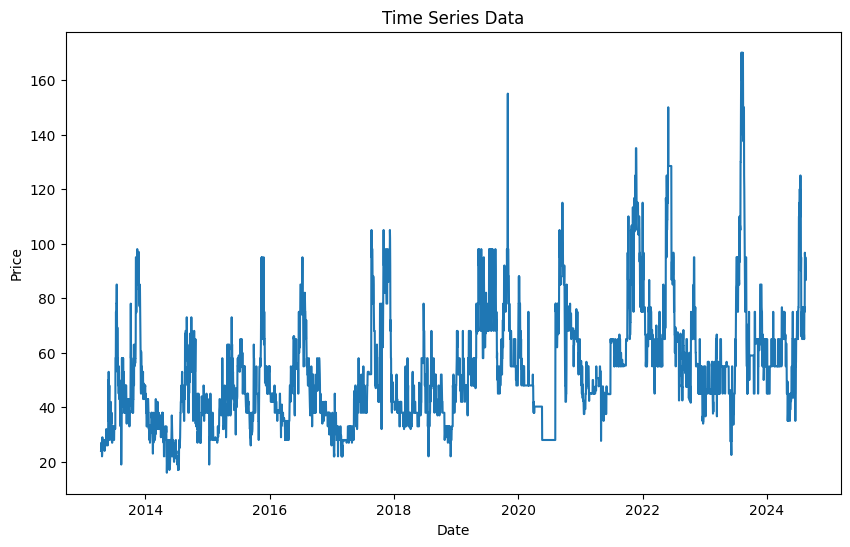

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(final_df.index, final_df['Average'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [45]:
decomposition = seasonal_decompose(final_df['Average'], model='additive', period=6)

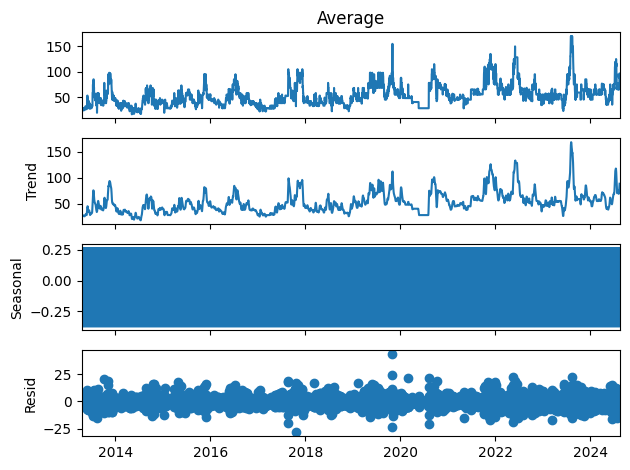

In [46]:
decomposition.plot();
plt.show()

In [47]:
decomposition = seasonal_decompose(final_df['Average'], model='multiplicative', period=6)

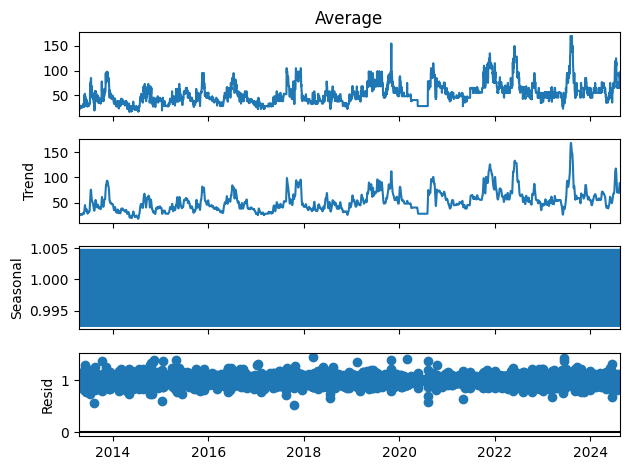

In [48]:
decomposition.plot()
plt.show()

The observed data shows clear variability over time, with repeated peaks, but no strong seasonal effect.
The trend shows a clear underlying movement, possibly indicating cycles of increases and decreases over time.
The seasonal component is insignificant (flat), meaning that the data likely does not have a periodic seasonal pattern.
The residuals appear evenly distributed, suggesting that most of the systematic variation is captured by the trend component.

In [49]:
decomposition.trend

Date
2013-04-15          NaN
2013-04-16          NaN
2013-04-17          NaN
2013-04-18    25.234375
2013-04-19    24.901042
                ...    
2024-08-12    85.974167
2024-08-13    88.335000
2024-08-14          NaN
2024-08-15          NaN
2024-08-16          NaN
Name: trend, Length: 4142, dtype: float64

In [50]:
decomposition.resid

Date
2013-04-15         NaN
2013-04-16         NaN
2013-04-17         NaN
2013-04-18    1.028499
2013-04-19    1.017365
                ...   
2024-08-12    1.122398
2024-08-13    1.081012
2024-08-14         NaN
2024-08-15         NaN
2024-08-16         NaN
Name: resid, Length: 4142, dtype: float64

In [51]:
decomposition.seasonal

Date
2013-04-15    1.003534
2013-04-16    1.004724
2013-04-17    1.002453
2013-04-18    1.001791
2013-04-19    0.994856
                ...   
2024-08-12    1.001791
2024-08-13    0.994856
2024-08-14    0.992643
2024-08-15    1.003534
2024-08-16    1.004724
Name: seasonal, Length: 4142, dtype: float64

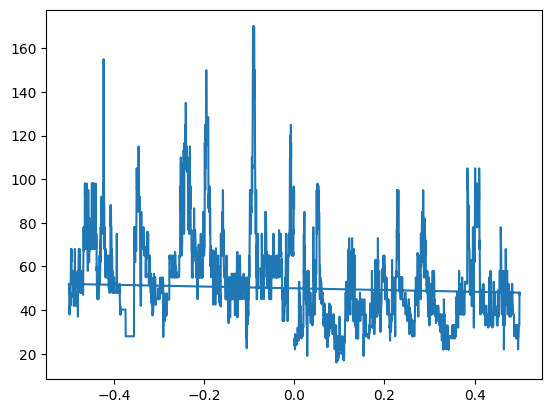

In [52]:
fft = np.fft.fft(final_df)
freqs = np.fft.fftfreq(len(fft))
plt.plot(freqs, np.abs(fft))
plt.show()

##plotting the magnitude of the FFT

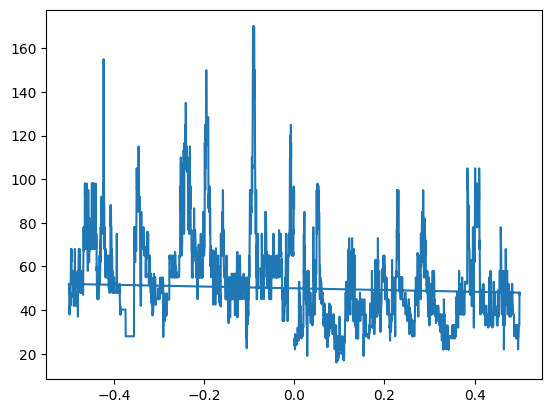

In [53]:

fft = np.fft.fft(final_df)
freqs = np.fft.fftfreq(len(fft))
plt.plot(freqs, np.abs(fft))
plt.show()


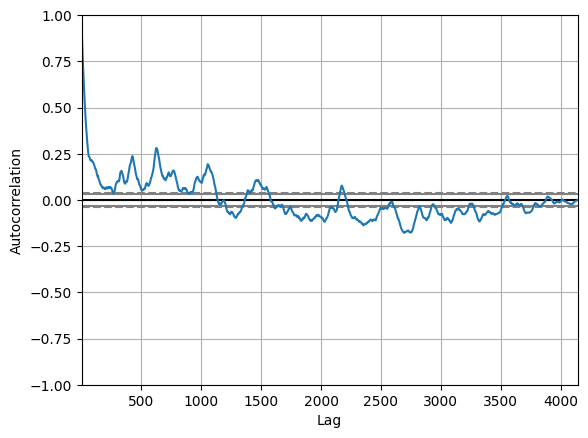

In [54]:
autocorrelation_plot(final_df)
plt.show()

Trend/Persistence: The slow decay of autocorrelation indicates that the time series has some persistence or trend component, meaning past values are influencing future values.

Possible Seasonality: Small peaks between lags 500 and 1500 suggest weak cyclical patterns, but these aren’t strong enough to indicate regular, strong seasonality.

Stationarity: Since the autocorrelation doesn’t oscillate wildly or stay high for long, the series could be weakly stationary, meaning its statistical properties (mean, variance) do not change dramatically over time, though this could still require formal tests like the Augmented Dickey-Fuller (ADF) test.

ADF Test detects unit root stationarity (or difference stationarity), which means that after differencing, the series might become stationary.
KPSS Test detects trend stationarity, which means that the series is stationary around a deterministic trend. This is useful because the ADF test might suggest a series is non-stationary, even if it is trend-stationary.

In [55]:
from statsmodels.tsa.stattools import adfuller, kpss


# Augmented Dickey-Fuller Test (ADF)
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Test Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}, {value}')
    if result[1] < 0.05:
        print("The data is stationary according to the ADF test (Reject Null Hypothesis).")
    else:
        print("The data is non-stationary according to the ADF test (Fail to reject Null Hypothesis).")

# KPSS Test
def kpss_test(series):
    result = kpss(series, regression='c')
    print('KPSS Test Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[3].items():
        print('Critical Values:')
        print(f'   {key}, {value}')
    if result[1] < 0.05:
        print("The data is non-stationary according to the KPSS test (Reject Null Hypothesis ).")
    else:
        print("The data is stationary according to the KPSS test (Fail to Reject Null Hypothesis).")


In [56]:
adf_test(final_df)
print("**"*30)
print("**"*30)
kpss_test(final_df)

ADF Test Statistic: -6.183693
p-value: 0.000000
Critical Values:
   1%, -3.4319335835169245
Critical Values:
   5%, -2.862239740326851
Critical Values:
   10%, -2.5671424781742664
The data is stationary according to the ADF test (Reject Null Hypothesis).
************************************************************
************************************************************
KPSS Test Statistic: 2.852923
p-value: 0.010000
Critical Values:
   10%, 0.347
Critical Values:
   5%, 0.463
Critical Values:
   2.5%, 0.574
Critical Values:
   1%, 0.739
The data is non-stationary according to the KPSS test (Reject Null Hypothesis ).


C:\Users\bishw\AppData\Local\Temp\ipykernel_8456\2193668991.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')


Scenario 1: ADF test says the series is stationary, but KPSS test says it is non-stationary.

This could indicate that the series has a trend and is trend-stationary, meaning you might want to remove the trend rather than difference the data.
Scenario 2: Both ADF and KPSS tests say the series is stationary.

In this case, you can confidently proceed, knowing the data is stationary and ready for modeling.
Scenario 3: Both ADF and KPSS tests say the series is non-stationary.

This likely means you need to apply transformations (e.g., differencing or detrending) to make the data stationary.

In [57]:
# Differencing the data
final_df_diff = final_df.diff().dropna()


adf_test(final_df_diff)
kpss_test(final_df_diff)


ADF Test Statistic: -25.648956
p-value: 0.000000
Critical Values:
   1%, -3.4319335835169245
Critical Values:
   5%, -2.862239740326851
Critical Values:
   10%, -2.5671424781742664
The data is stationary according to the ADF test (Reject Null Hypothesis).
KPSS Test Statistic: 0.007243
p-value: 0.100000
Critical Values:
   10%, 0.347
Critical Values:
   5%, 0.463
Critical Values:
   2.5%, 0.574
Critical Values:
   1%, 0.739
The data is stationary according to the KPSS test (Fail to Reject Null Hypothesis).


C:\Users\bishw\AppData\Local\Temp\ipykernel_8456\2193668991.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')


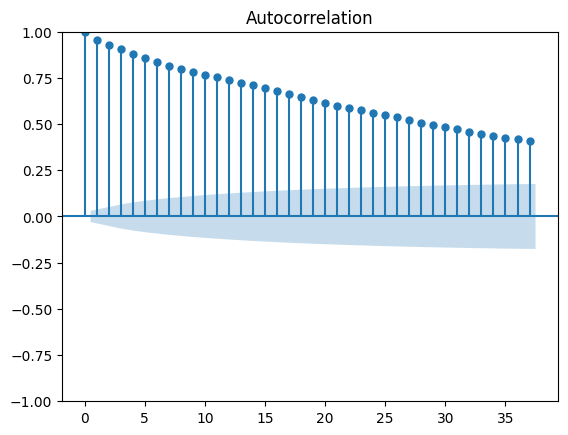

************************************************************


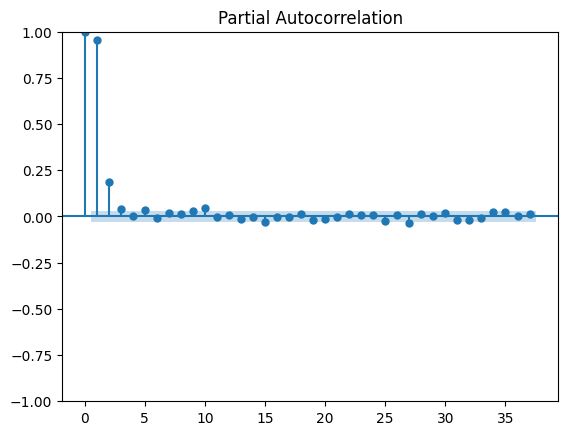

In [58]:
# Plot ACF
plot_acf(final_df)
plt.show()
print("**"*30)
# Plot PACF
plot_pacf(final_df)
plt.show()


In the  plot, the autocorrelation coefficients appear to decrease as the lag increases, suggesting that there is a strong correlation between values at nearby time points but a weaker correlation between values at more distant time points

The slow decay of the ACF suggests that the AR component might be of higher order than 1 or 2.

The PACF plot shows a significant spike at lag 1, indicating a strong correlation between the current value and the value at the previous time step.

The spikes in the PACF plot decay relatively quickly after lag 1, suggesting that the correlation between the current value and values at lags greater than 1 is not as strong.

In [59]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [60]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
def arima_model(X,y,arima_order):
    history=[i for i in X]
    prediction=list()
    for i in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        y_hat = model_fit.forecast()
        prediction.append(y_hat)
        history.append(y[i])
    mse = np.sqrt(mean_squared_error(y, prediction))
    return mse

In [62]:
length = final_df.shape[0]

In [63]:
length

4142

In [64]:
train_data = final_df[:int(length*0.8)]

In [65]:
len(train_data)

3313

In [66]:
test_data = final_df[int(length*0.8):]

In [67]:
len(test_data)

829

f:\Unversity\TimeSeriesAnalysis\KalimatiTarkari\kalimati\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


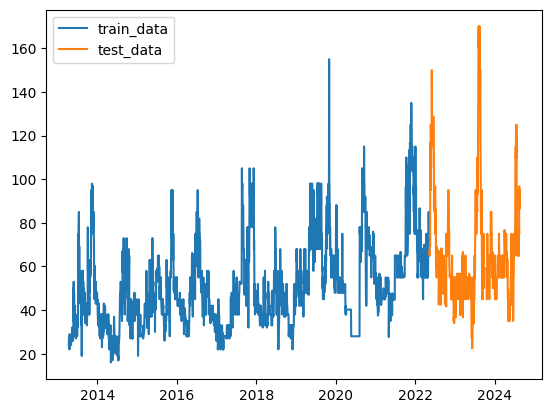

In [68]:
plt.plot(train_data,label="train_data")
plt.plot(test_data, label="test_data")
plt.legend();

In [69]:
p = 1
q = 0
d = 1 
order = (p,d,q)

In [70]:
[i for i in train_data['Average']]

[24.0,
 25.0,
 27.0,
 26.0,
 25.203125,
 25.203125,
 22.0,
 23.0,
 29.0,
 25.068836300872093,
 28.0,
 28.0,
 26.478049617760508,
 28.0,
 28.0,
 26.0,
 26.907317399224045,
 28.0,
 28.0,
 27.432645572674023,
 26.0,
 24.0,
 25.0,
 26.0,
 27.0,
 26.0,
 26.15919440109962,
 26.0,
 27.0,
 26.0,
 30.0,
 32.0,
 30.0,
 28.79275527007248,
 29.0,
 29.0,
 29.0,
 29.0,
 27.0,
 26.0,
 27.840952206704365,
 29.0,
 28.197582296949175,
 50.0,
 34.90601851327251,
 53.0,
 48.0,
 42.35504807419918,
 43.0,
 48.0,
 33.0,
 28.0,
 30.0,
 35.91731672058029,
 35.91731672058029,
 38.0,
 38.0,
 42.0,
 33.0,
 38.0,
 34.0,
 36.40841921792622,
 38.0,
 28.0,
 28.0,
 27.0,
 27.0,
 28.0,
 29.783444473377752,
 29.783444473377752,
 29.783444473377752,
 33.0,
 33.0,
 33.0,
 33.0,
 32.241960459404865,
 28.0,
 28.0,
 33.0,
 33.0,
 33.0,
 33.0,
 32.11487135852753,
 32.11487135852753,
 32.11487135852753,
 58.0,
 58.0,
 58.0,
 75.0,
 56.14970082554953,
 78.0,
 78.0,
 85.0,
 85.0,
 68.0,
 58.0,
 69.25791734566383,
 53.0,
 58.0,
 

In [71]:
mse = arima_model(train_data['Average'], test_data['Average'],order)

C:\Users\bishw\AppData\Local\Temp\ipykernel_8456\251071207.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[i])


In [73]:
mse

np.float64(7.287314182863884)

In [74]:
train_data = train_data['Average']
test_data = test_data['Average']

In [86]:
history = [x for x in train_data]
predictions = list()

for t in range(len(test_data)):
    model = ARIMA(history,order=(2,1,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    
    history.append(test_data[t])
print('MSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

f:\Unversity\TimeSeriesAnalysis\KalimatiTarkari\kalimati\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\bishw\AppData\Local\Temp\ipykernel_8456\2567055715.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test_data[t])


MSE of ARIMA Model: 7.289186409708615


In [76]:
predictions

[array([76.33410599]),
 array([68.68275464]),
 array([65.33559187]),
 array([68.36266373]),
 array([69.20864212]),
 array([69.20864212]),
 array([69.20864212]),
 array([69.20864212]),
 array([107.13131743]),
 array([115.33028199]),
 array([104.12681002]),
 array([112.30568089]),
 array([99.01684429]),
 array([118.84186292]),
 array([117.06246108]),
 array([107.0522663]),
 array([108.04233603]),
 array([108.82865165]),
 array([115.05976951]),
 array([123.29490361]),
 array([117.05276177]),
 array([134.81975801]),
 array([147.95971628]),
 array([132.89210025]),
 array([128.46271631]),
 array([128.46271631]),
 array([128.46271631]),
 array([128.46271631]),
 array([128.46271631]),
 array([128.46271631]),
 array([128.46271631]),
 array([128.46271631]),
 array([128.46271631]),
 array([128.46271631]),
 array([128.46271631]),
 array([128.46271631]),
 array([128.46271631]),
 array([128.46271631]),
 array([128.46271631]),
 array([128.46271631]),
 array([128.46271631]),
 array([101.85534324]),
 a

In [85]:
test_data

Date
2022-05-11    66.670000
2022-05-12    65.000000
2022-05-13    69.208642
2022-05-14    69.208642
2022-05-15    69.208642
                ...    
2024-08-12    96.670000
2024-08-13    95.000000
2024-08-14    86.670000
2024-08-15    95.000000
2024-08-16    86.670000
Name: Average, Length: 829, dtype: float64

In [77]:
len(predictions)

829

In [93]:
residual = np.array(test_data) - predictions

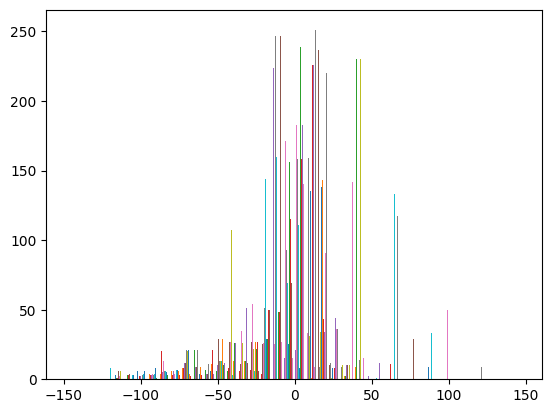

In [97]:
plt.hist(residual,bins=40);

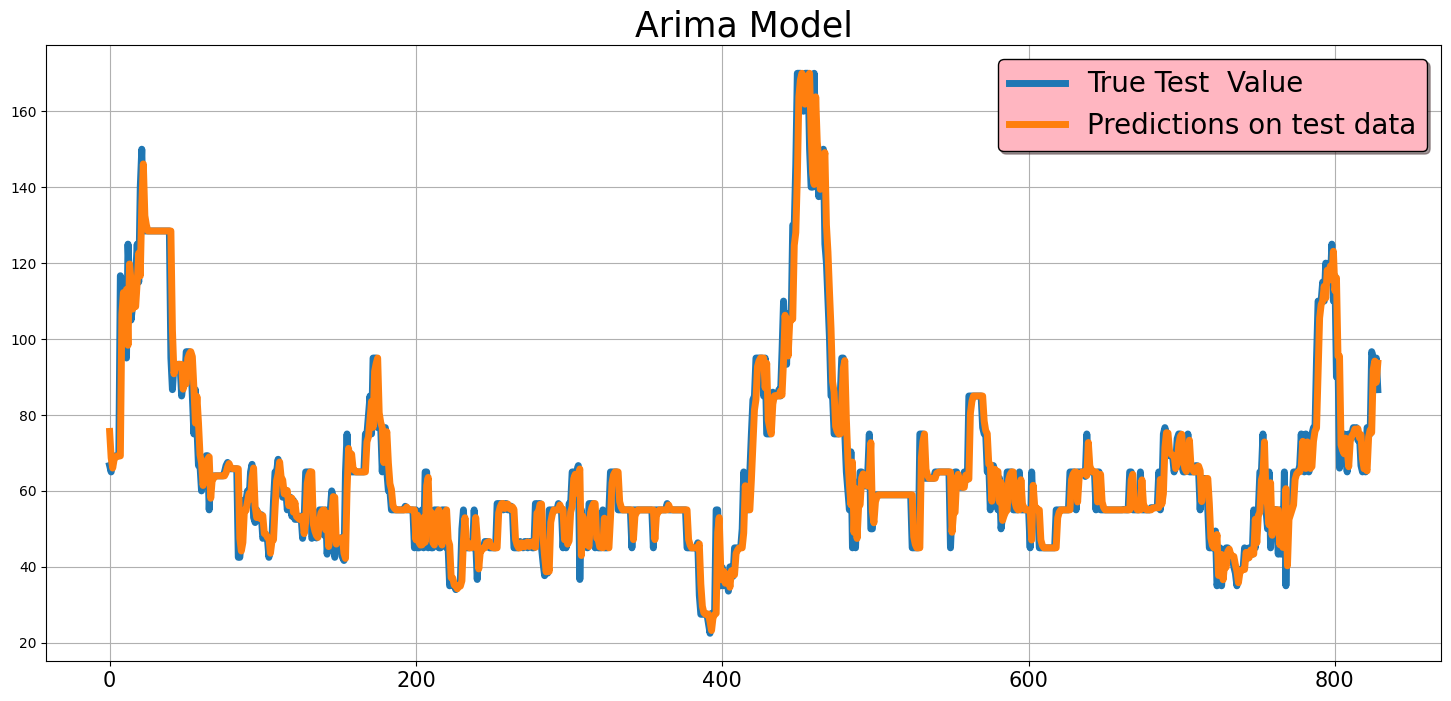

In [98]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.title("Arima Model",fontsize = 25)
plt.plot(range(len(test_data)),test_data, label = 'True Test  Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [138]:
model_fit.forecast(alpha = 0.05)

f:\Unversity\TimeSeriesAnalysis\KalimatiTarkari\kalimati\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


array([93.25847425])

In [139]:
test_data

Date
2022-05-11    66.670000
2022-05-12    65.000000
2022-05-13    69.208642
2022-05-14    69.208642
2022-05-15    69.208642
                ...    
2024-08-12    96.670000
2024-08-13    95.000000
2024-08-14    86.670000
2024-08-15    95.000000
2024-08-16    86.670000
Name: Average, Length: 829, dtype: float64

In [102]:
residual = model_fit.resid

In [103]:
residual

array([24.        ,  1.00019451,  2.20908336, ...,  3.01863556,
       -7.49455719,  6.39923183])

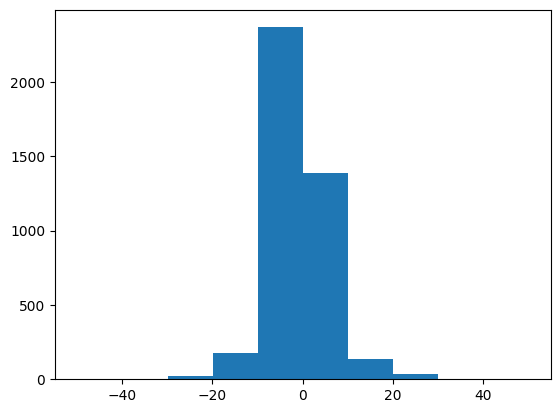

In [104]:
plt.hist(residual);

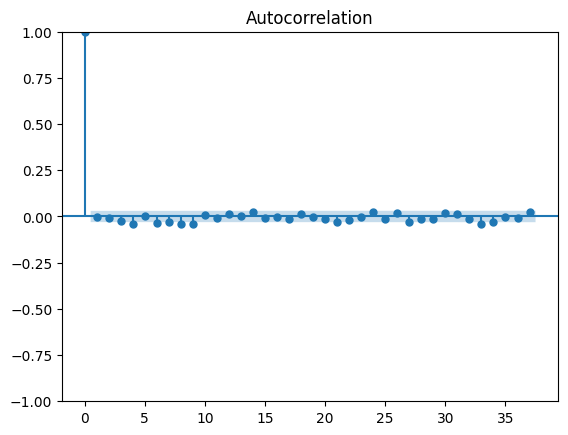

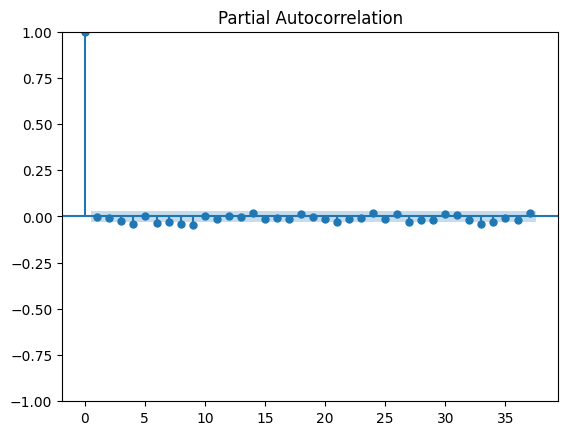

In [110]:
plot_acf(residual);
plot_pacf(residual);